In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\Users\rawan\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
path = kagglehub.dataset_download("alxmamaev/flowers-recognition")

print("Path to dataset files:", path)

100%|██████████| 225M/225M [01:38<00:00, 2.39MB/s] 

Extracting files...


Path to dataset files: C:\Users\rawan\.cache\kagglehub\datasets\alxmamaev\flowers-recognition\versions\2


In [3]:
# Set the path to the dataset inside the 'task 5' folder
path = "d:/Rawan/NTI/repo/NTI-Computer-Vision/task 5/flowers"
print("Path to dataset files:", path)

Path to dataset files: d:/Rawan/NTI/repo/NTI-Computer-Vision/task 5/flowers


In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [5]:
train = datagen.flow_from_directory(
    'd:/Rawan/NTI/repo/NTI-Computer-Vision/task 5/flowers',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical', 
    subset='training', 
    shuffle=True
)

# Load validation images
val = datagen.flow_from_directory(
    'd:/Rawan/NTI/repo/NTI-Computer-Vision/task 5/flowers',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [18]:
# Simple CNN model
CNN_model = Sequential()
CNN_model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)))
CNN_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Flatten()) # The connection between the CNN BLOCK and NN Block (Fully Connected-Classifier)
CNN_model.add(Dense(512,activation='relu'))
CNN_model.add(Dense(256,activation='relu'))
CNN_model.add(Dense(128,activation='relu'))
CNN_model.add(Dense(train.num_classes, activation='softmax'))
# Compile
CNN_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\rawan\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
CNN_model = Sequential()

# Block 1
CNN_model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(128,128,3)))
CNN_model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
CNN_model.add(MaxPooling2D((2,2)))

# Block 2
CNN_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
CNN_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
CNN_model.add(MaxPooling2D((2,2)))

# Block 3
CNN_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
CNN_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
CNN_model.add(MaxPooling2D((2,2)))

# Flatten → Dense layers
CNN_model.add(Flatten())
CNN_model.add(Dense(256, activation='relu'))
CNN_model.add(Dropout(0.5))   # helps prevent overfitting
CNN_model.add(Dense(train.num_classes, activation='softmax'))

CNN_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\rawan\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
CNN_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,677,157 (33.10 MB)

 Trainable params: 8,677,157 (33.10 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# cnn 2
history = CNN_model.fit(
    train,
    validation_data=val,
    epochs=20,              # number of training rounds
    batch_size=32,          # how many images per step
    verbose=1               # shows progress
)


Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 33s 297ms/step - accuracy: 0.5526 - loss: 1.1362 - val_accuracy: 0.5907 - val_loss: 1.0997
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 33s 297ms/step - accuracy: 0.5526 - loss: 1.1362 - val_accuracy: 0.5907 - val_loss: 1.0997
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 34s 307ms/step - accuracy: 0.5664 - loss: 1.0739 - val_accuracy: 0.5930 - val_loss: 1.0345
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 34s 307ms/step - accuracy: 0.5664 - loss: 1.0739 - val_accuracy: 0.5930 - val_loss: 1.0345
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 35s 309ms/step - accuracy: 0.6070 - loss: 1.0118 - val_accuracy: 0.6256 - val_loss: 0.9898
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 35s 309ms/step - accuracy: 0.6070 - loss: 1.0118 - val_accuracy: 0.6256 - val_loss: 0.9898
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 37s 331ms/step - accuracy: 0.6216 - loss: 0.9892 - val_accuracy: 0.6442 - val_loss: 0.9699
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 37s 331ms/step - accuracy: 0.6216 - loss: 0

In [29]:
# cnn2
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_acc:.2f}")
print(f"Final Validation Accuracy: {val_acc:.2f}")


Final Training Accuracy: 0.72
Final Validation Accuracy: 0.71


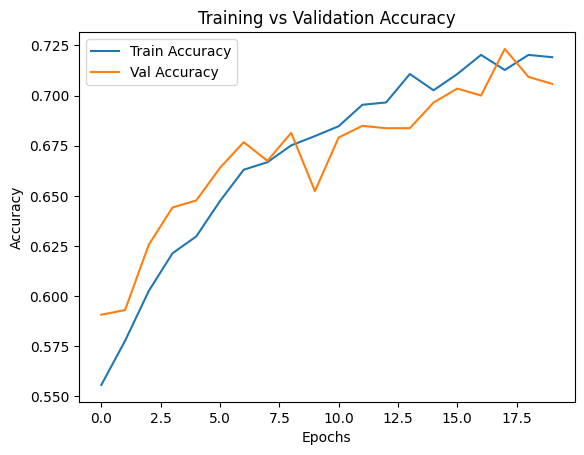

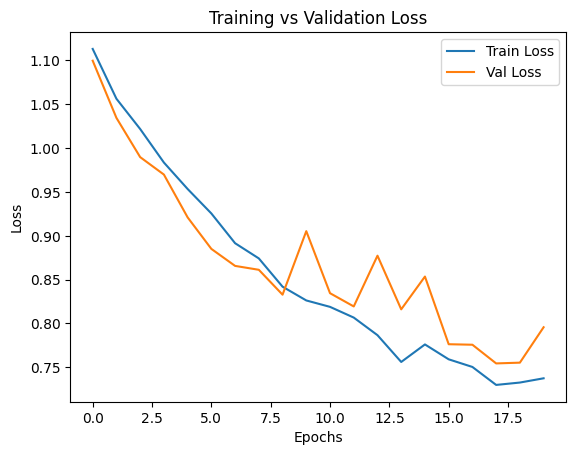

In [30]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.show()


In [22]:
#cnn 1
loss, accuracy = CNN_model.evaluate(val)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.6508 - loss: 1.0276
Validation Loss: 0.9518067240715027
Validation Accuracy: 0.6499999761581421
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.6508 - loss: 1.0276
Validation Loss: 0.9518067240715027
Validation Accuracy: 0.6499999761581421
